In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['beds'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['beds'].max()
Min = Mexico['beds'].min()
Limites = [Min, Max]
Limites

[0.0, 6.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

6.0

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.38241817134564404

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (0, 6, 16)
intervalos

array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8,
       5.2, 5.6, 6. ])

In [10]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14", "Categoria15" ]

In [11]:
# Creamos las ctegorias en la columna numerica
Mexico['beds'] = pd.cut ( x = Mexico ['beds'], bins = intervalos, labels = categorias )
Mexico['beds']

0        Categoria3
1        Categoria5
2        Categoria5
3        Categoria3
4        Categoria3
            ...    
26577    Categoria5
26578    Categoria3
26579    Categoria3
26580    Categoria3
26581    Categoria3
Name: beds, Length: 26582, dtype: category
Categories (15, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria12' < 'Categoria13' < 'Categoria14' < 'Categoria15']

In [12]:
table1 = freq_tbl(Mexico['beds'])
table1

beds  frequency  percentage  cumulative_perc
0    Categoria3      11409    0.429200         0.436959
1    Categoria5       9886    0.371906         0.815588
2    Categoria8       2834    0.106613         0.924129
3   Categoria10       1285    0.048341         0.973344
4   Categoria13        449    0.016891         0.990540
5   Categoria15        247    0.009292         1.000000
6    Categoria1          0    0.000000         1.000000
7    Categoria2          0    0.000000         1.000000
8    Categoria4          0    0.000000         1.000000
9    Categoria6          0    0.000000         1.000000
10   Categoria7          0    0.000000         1.000000
11   Categoria9          0    0.000000         1.000000
12  Categoria11          0    0.000000         1.000000
13  Categoria12          0    0.000000         1.000000
14  Categoria14          0    0.000000         1.000000

In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

beds  frequency
0    Categoria3      11409
1    Categoria5       9886
2    Categoria8       2834
3   Categoria10       1285
4   Categoria13        449
5   Categoria15        247
6    Categoria1          0
7    Categoria2          0
8    Categoria4          0
9    Categoria6          0
10   Categoria7          0
11   Categoria9          0
12  Categoria11          0
13  Categoria12          0
14  Categoria14          0

In [14]:
# Obtener un filtro de los valores más relevantes de las vaiables categóricas seleccionadas

Filtro = table2[ table2['frequency'] > 0]
Filtro

beds  frequency
0   Categoria3      11409
1   Categoria5       9886
2   Categoria8       2834
3  Categoria10       1285
4  Categoria13        449
5  Categoria15        247

In [15]:
# Ajusto el indice de mi data frame

Filtro_index = Filtro.set_index('beds')
Filtro_index

frequency
beds                  
Categoria3       11409
Categoria5        9886
Categoria8        2834
Categoria10       1285
Categoria13        449
Categoria15        247

<Axes: xlabel='beds'>

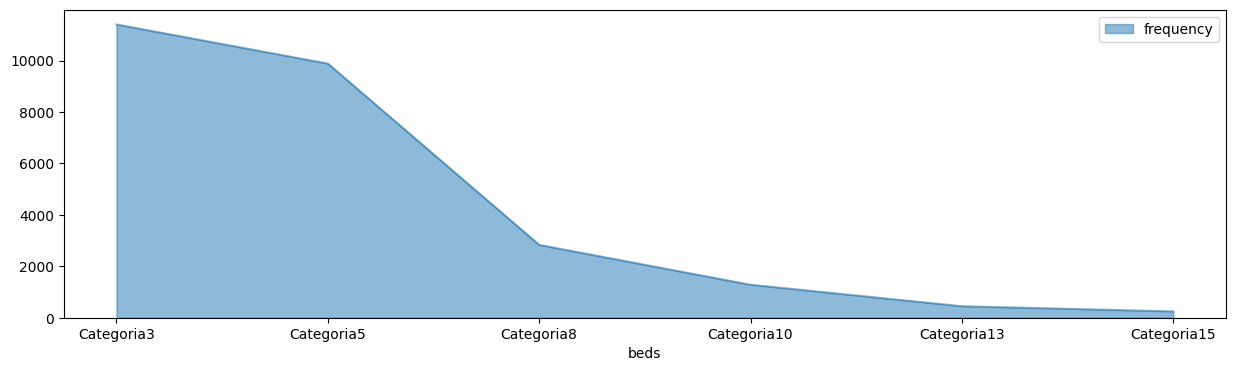

In [17]:
# Realizamos gráfico de area del dataframe filtrado
Filtro_index.plot(kind = 'area', figsize = (15,4), alpha = 0.5)